# download the dataset (train and test files)

In [1]:
!wget http://ps2.railsreactor.net/datasets/medicine/heart_test.csv -O heart_test.csv -o wget.log

!wget http://ps2.railsreactor.net/datasets/medicine/heart_train.csv -O heart_train.csv -o wget.log

# load and concatenate those datasets via pandas

In [2]:
# vizualizing
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns

train_data = pd.read_csv('heart_train.csv')
test_data = pd.read_csv('heart_test.csv')

full_data = pd.concat((train_data, test_data)).reset_index().drop(["index"], axis=1)

# print the dataset size and first rows from the dataset

In [3]:
full_data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
5,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
6,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
7,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
8,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
9,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1


In [4]:
full_data.shape

(303, 14)

In [5]:
full_data.size

4242

# print the lists of numeric, categorical and boolean columns

In [6]:
numeric_cols = []
categorical_cols = []
boolean_cols = []

In [7]:
for col in full_data:
    unique = full_data[col].unique()
    if len(unique) == 2:
        boolean_cols.append(col)
    elif len(unique) > 5:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

In [8]:
# numeric
full_data[numeric_cols].columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [9]:
# categorical
full_data[categorical_cols].columns

Index(['cp', 'restecg', 'slope', 'ca', 'thal'], dtype='object')

In [10]:
# boolean
full_data[boolean_cols].columns

Index(['sex', 'fbs', 'exang', 'target'], dtype='object')

# analyze values distribution for each numerical column

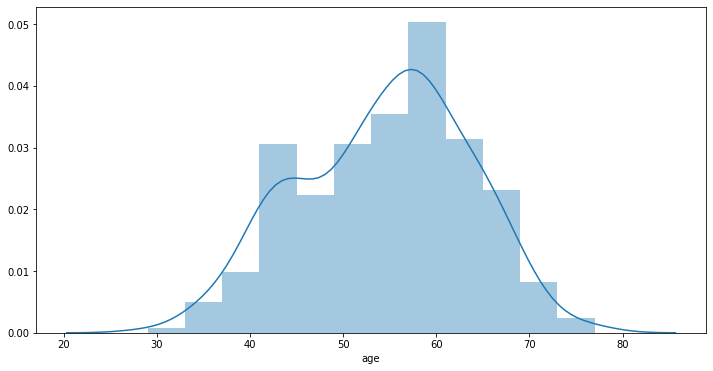

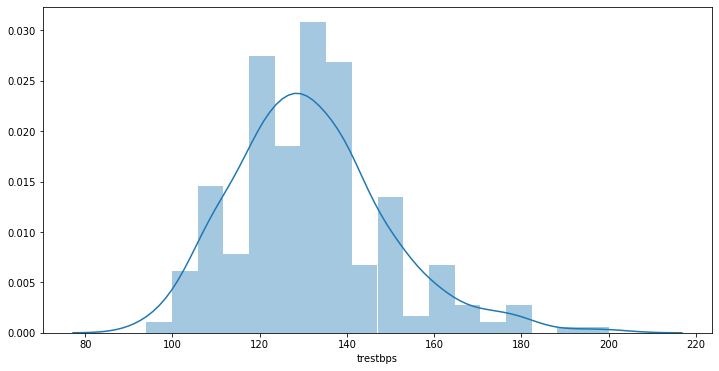

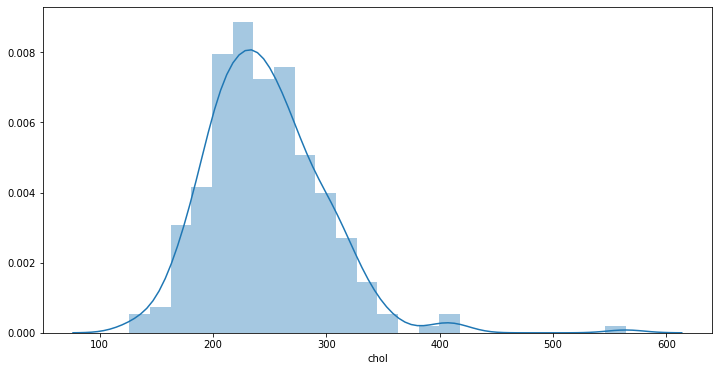

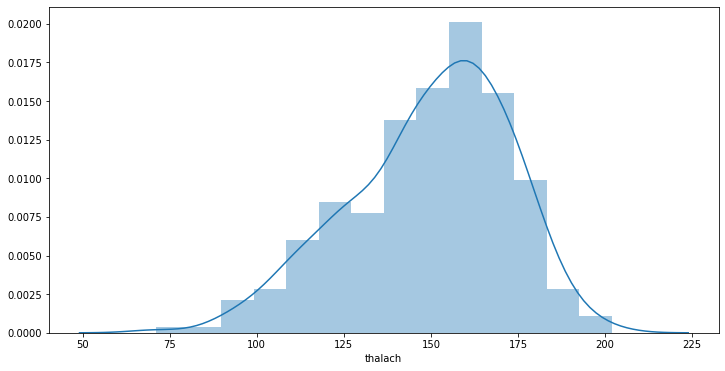

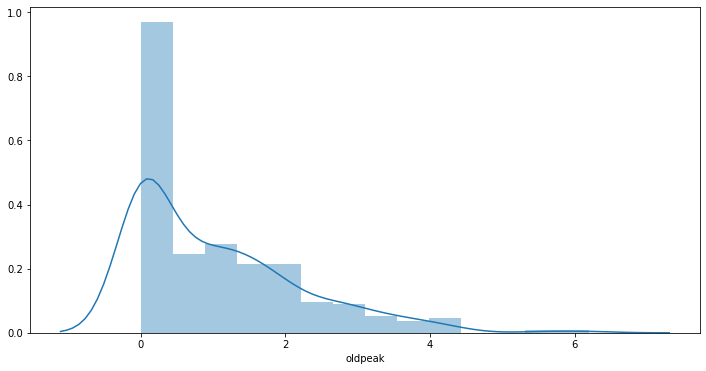

In [11]:
numeric = full_data[numeric_cols]

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.distplot(numeric[col])

# analyze frequency distribution of values for each categorical column

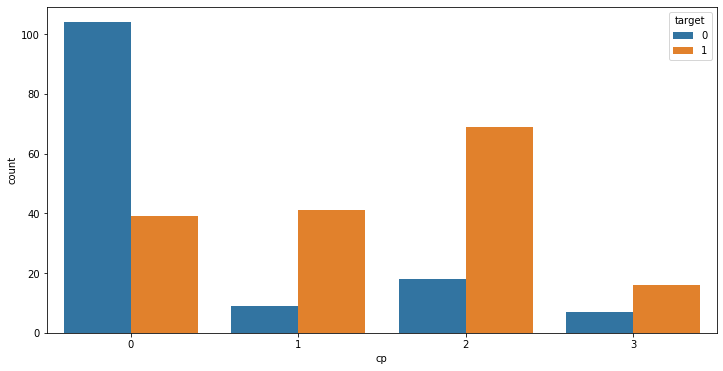

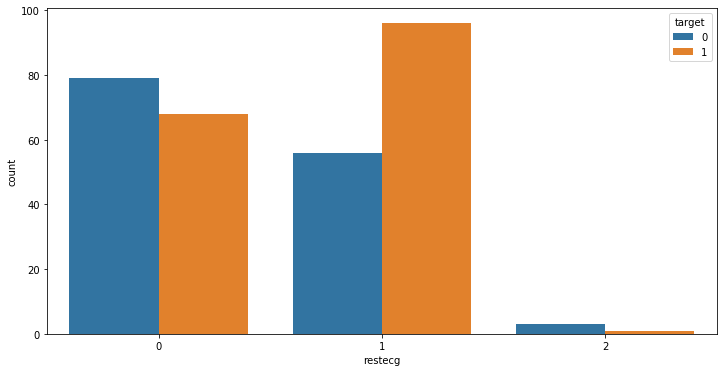

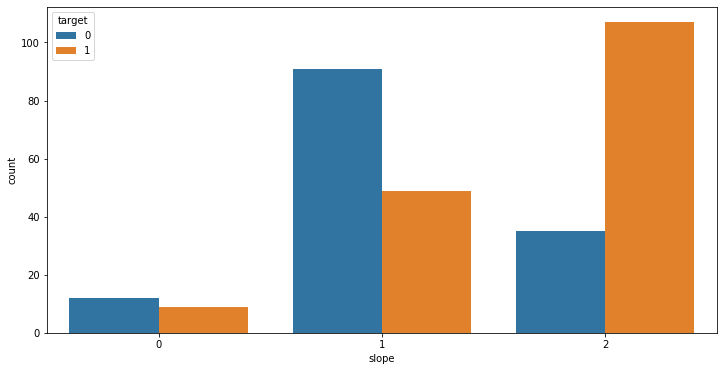

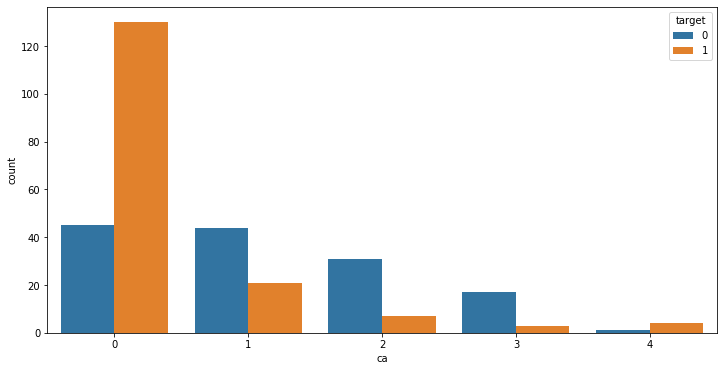

In [12]:
indices = [full_data.columns.get_loc(c) for c in categorical_cols]

for col in full_data.columns[indices].values[:-1]:
    plt.figure(figsize=(12, 6))
    sns.countplot(col, data=full_data, hue='target')

# analyze frequency distribution of values for each boolean columns

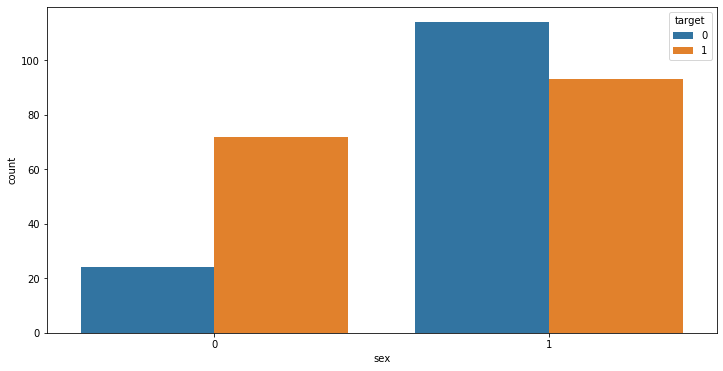

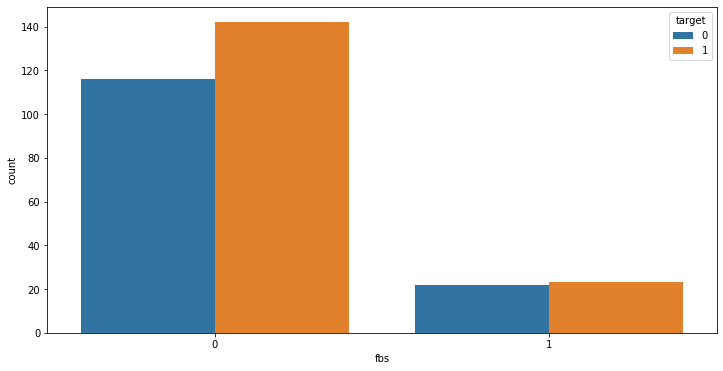

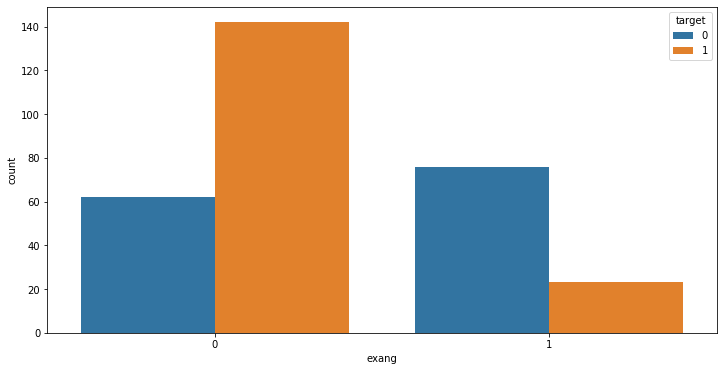

In [13]:
indices = [full_data.columns.get_loc(c) for c in boolean_cols]

for col in full_data.columns[indices].values[:-1]:
    plt.figure(figsize=(12, 6))
    sns.countplot(col, data=full_data, hue='target')

# analyze correlation between columns

In [14]:
corr = full_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0984466,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.0968008,0.210013,-0.168814,0.276326,0.0680014,-0.225439
sex,-0.0984466,1,-0.0493529,-0.0567688,-0.197912,0.0450318,-0.0581963,-0.0440199,0.141664,0.0960929,-0.0307106,0.118261,0.210041,-0.280937
cp,-0.068653,-0.0493529,1,0.0476078,-0.0769044,0.094444,0.0444206,0.295762,-0.39428,-0.14923,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.0567688,0.0476078,1,0.123174,0.177531,-0.114103,-0.0466977,0.0676161,0.193216,-0.121475,0.101389,0.0622099,-0.144931
chol,0.213678,-0.197912,-0.0769044,0.123174,1,0.0132936,-0.15104,-0.00993984,0.0670228,0.0539519,-0.00403777,0.0705109,0.098803,-0.0852391
fbs,0.121308,0.0450318,0.094444,0.177531,0.0132936,1,-0.0841891,-0.00856711,0.0256651,0.00574722,-0.0598942,0.137979,-0.0320193,-0.0280458
restecg,-0.116211,-0.0581963,0.0444206,-0.114103,-0.15104,-0.0841891,1,0.0441234,-0.0707329,-0.0587702,0.0930448,-0.0720424,-0.0119814,0.13723
thalach,-0.398522,-0.0440199,0.295762,-0.0466977,-0.00993984,-0.00856711,0.0441234,1,-0.378812,-0.344187,0.386784,-0.213177,-0.0964391,0.421741
exang,0.0968008,0.141664,-0.39428,0.0676161,0.0670228,0.0256651,-0.0707329,-0.378812,1,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.0960929,-0.14923,0.193216,0.0539519,0.00574722,-0.0587702,-0.344187,0.288223,1,-0.577537,0.222682,0.210244,-0.430696


# perform preprocessing (standardization)

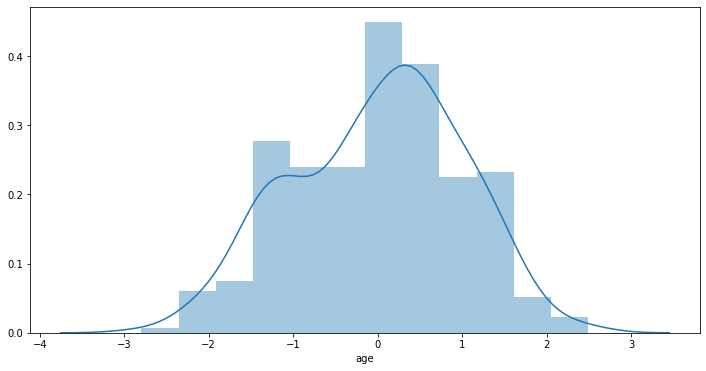

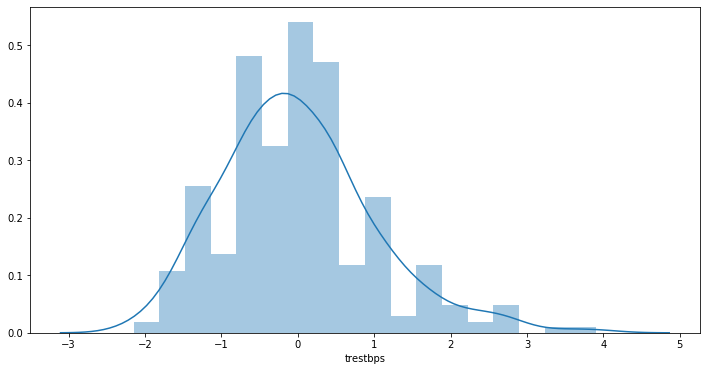

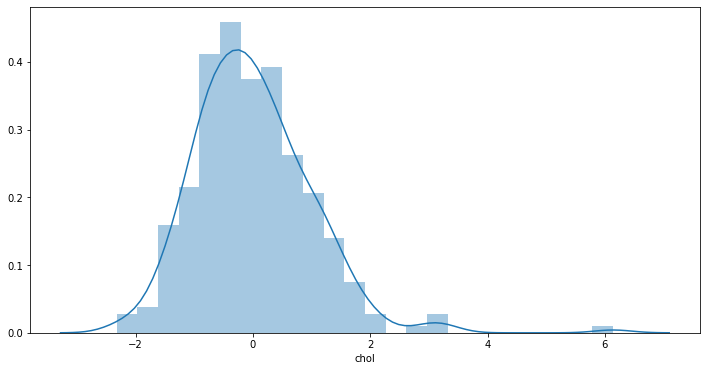

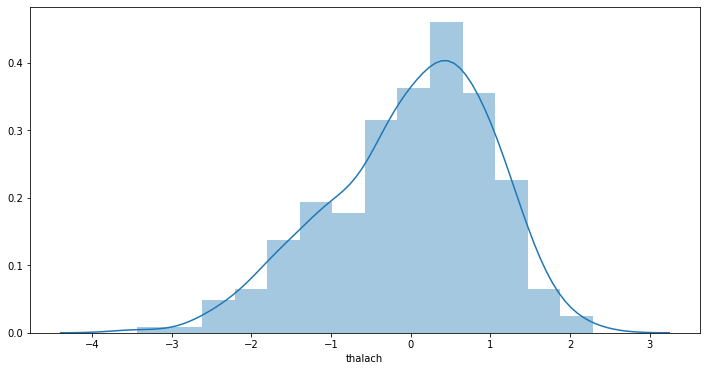

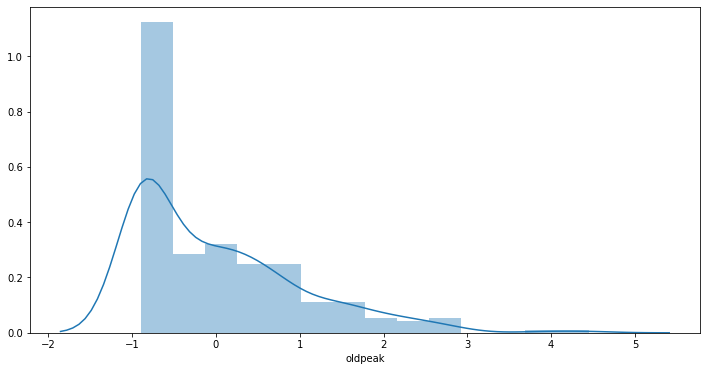

In [15]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

full_data[numeric_cols] = standard_scaler.fit_transform(full_data[numeric_cols])
numeric = full_data[numeric_cols]

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.distplot(numeric[col])

# generate automatic report for the dataset via pandas_profiling library

In [16]:
import pandas_profiling

def get_profiling(df, output_name):
    profile = pandas_profiling.ProfileReport(df=df)
    profile.to_file(output_name)

In [17]:
get_profiling(full_data, "heart_stat.html")